In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread('aguacate.png')
cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
variables = 6
bounds = []
for i in range(variables):
    bounds.append([0,255])
bounds

[[0, 255], [0, 255], [0, 255], [0, 255], [0, 255], [0, 255]]

## Individual


In [3]:
# <r1,g1,b1,r2,g2,b2>
def Individual(bounds):
    ind = []
    for i in range(len(bounds)):
        ind.append(np.random.randint(bounds[i][0], bounds[i][1]))
    return ind

ind = Individual(bounds)
ind

[249, 142, 254, 195, 115, 40]

In [4]:
# Distancia entre puntos pixel vs centroide #color
def f(pixel, ind):
    Dif = 0
    minimum = None
    for i in range(int(len(ind)/3)):
        newPixel = ind[3*i:3*i+3]
        Dif = np.linalg.norm(newPixel-pixel)
        if minimum is None or Dif < minimum:
            minimum = Dif
    Dif = minimum
    return Dif

In [5]:
def FitIndividual(ind, img):
    sumDif = 0
    for i in range(len(img)):
        for j in range(len(img[i])):
            point = img[i][j]
            sumDif += f(point, ind)
    return sumDif
fit = FitIndividual(ind, img)
fit

4250388.494265703

In [6]:
def NewPopulation(size, bounds):
    population = []
    for i in range(size):
        population.append(Individual(bounds))
    return population

popu = NewPopulation(10, bounds)
popu

[[56, 114, 110, 194, 74, 19],
 [220, 32, 170, 199, 23, 115],
 [57, 66, 96, 184, 197, 203],
 [161, 168, 3, 121, 136, 250],
 [151, 162, 61, 94, 124, 121],
 [235, 59, 48, 74, 201, 100],
 [7, 238, 113, 94, 222, 228],
 [217, 146, 34, 5, 78, 38],
 [140, 236, 66, 135, 21, 137],
 [179, 26, 206, 134, 211, 165]]

In [7]:
def FitPopulation(population, img):
    fit = []
    for i in range (len(population)):
        fit.append(FitIndividual(population[i],img))
    return fit

fit = FitPopulation(popu, img)
fit

[5859785.165305396,
 6467640.279522046,
 2994480.985390301,
 4524788.950213716,
 3637744.869481246,
 4673141.912927878,
 4992703.513389985,
 4184555.324620885,
 3485236.443737239,
 3227198.9746195544]

In [8]:
def Mutate(population, bounds):
    V = []
    for i in range(len(population)):
        n = len(population)
        F = np.random.uniform(0.1, 2)
        random = np.random.randint(n)
        random2 = np.random.randint(n)
        while random2 == random:
            random2 = np.random.randint(n)
        random3= np.random.randint(n)
        while random3 == random | random3 == random2:
            random2 = np.random.randint(n)
        v = population[random]+F*np.subtract(population[random2],population[random3])
        V.append(v.astype(int))
        for j in range (len(bounds)):
            if V[i][j] <  bounds[j][0]: V[i][j] = bounds[j][0]
            elif V[i][j] >  bounds[j][1]: V[i][j] = bounds[j][1]
    return V

mutas = Mutate(popu, bounds)
mutas

[array([  0, 199, 204, 255, 217, 205]),
 array([  0, 255,   0,  84, 221,   0]),
 array([  0, 220,   0, 186, 117, 255]),
 array([211,  44, 165, 204,  15, 131]),
 array([233, 102, 125,  53, 216, 219]),
 array([  0, 255, 121,  96, 224, 243]),
 array([224, 144,  30,   0,  72,  28]),
 array([  0,  55, 156,  75, 255, 255]),
 array([140, 195,  54, 126, 123, 255]),
 array([255,  95,   0,  24, 243, 255])]

In [9]:
def Reproduction(population, mutes, CR):
    U = []
    for i in range(len(population)):
        Uj = []
        for j in range(len(population[i])):
            r = np.random.uniform(0, 1)
            if r < CR:
                Uj.append(mutes[i][j])
            else:
                Uj.append(population[i][j])
        l = np.random.randint(len(population[i]))
        Uj[l] = mutes[i][l]
        U.append(np.array(Uj))
    return U
                       
cruzas = Reproduction(popu, mutas, 0.8)
cruzas

[array([  0, 199, 204, 255, 217, 205]),
 array([  0, 255,   0,  84, 221,   0]),
 array([  0, 220,   0, 186, 197, 255]),
 array([211,  44, 165, 204, 136, 250]),
 array([233, 102, 125,  53, 216, 219]),
 array([  0, 255, 121,  96, 224, 243]),
 array([224, 144,  30,   0,  72,  28]),
 array([  0,  55,  34,   5, 255, 255]),
 array([140, 195,  54, 126, 123, 255]),
 array([179,  95,   0,  24, 211, 255])]

In [10]:
def Selection(population, breeds, img):
    fitPopulation = FitPopulation(np.array(population), img)
    fitBreeds = FitPopulation(np.array(breeds), img)
    individuals = []
    fit_ind = []
    for i in range(len(population)):
        if fitPopulation[i] <= fitBreeds[i]:
            individuals.append(np.array(population[i]))
            fit_ind.append(np.array(fitPopulation[i]))
        else:
            individuals.append(breeds[i])
            fit_ind.append(np.array(fitBreeds[i]))
    return individuals, fit_ind

seleccion, fitSeleccion = Selection(popu, cruzas, img)
print(seleccion, fitSeleccion)

[array([  0, 199, 204, 255, 217, 205]), array([  0, 255,   0,  84, 221,   0]), array([ 57,  66,  96, 184, 197, 203]), array([161, 168,   3, 121, 136, 250]), array([151, 162,  61,  94, 124, 121]), array([235,  59,  48,  74, 201, 100]), array([224, 144,  30,   0,  72,  28]), array([217, 146,  34,   5,  78,  38]), array([140, 236,  66, 135,  21, 137]), array([179,  26, 206, 134, 211, 165])] [array(3089007.14937914), array(5942302.42143325), array(2994480.9853903), array(4524788.95021372), array(3637744.86948125), array(4673141.91292788), array(4357895.12487267), array(4184555.32462088), array(3485236.44373724), array(3227198.97461955)]


In [11]:
def Elite(population, fitness):
    individuals = population.copy()
    idx = np.argsort(fitness)
    return individuals[idx[0]], fitness[idx[0]]

elite, aptElite = Elite(popu, fit)
print(elite, aptElite)

[57, 66, 96, 184, 197, 203] 2994480.985390301


In [12]:
def EvolucionDiferencial(bounds, img):
    g = 0
    G = 100
    p = 100
    CR = 0.8
    poblacion = NewPopulation(p, bounds)
    fitness = FitPopulation(poblacion, img)
    elite, aptElite = Elite(poblacion, fitness)
    print("elite:",elite,"fitness:",aptElite)
    
    while g < G:
        mutas = Mutate(poblacion, bounds)
        cruzas = Reproduction(poblacion, mutas, CR)
        poblacion, fitPoblacion = Selection(poblacion, cruzas, img)
        elite, aptElite = Elite(poblacion, fitPoblacion)
        print("elite:",elite,"fitness:",aptElite)
        g+=1
    return elite

sol = EvolucionDiferencial(bounds, img)
print("Solucion:", sol)

elite: [99, 114, 1, 208, 220, 88] fitness: 1958539.2552100709
elite: [255 255 198 188 233 130] fitness: 1789537.8795078394
elite: [ 95 140   0 209 235 157] fitness: 1614060.3845489065
elite: [ 95 140   0 209 235 157] fitness: 1614060.3845489065
elite: [ 95 140   0 209 235 157] fitness: 1614060.3845489065
elite: [ 95 140   0 209 235 157] fitness: 1614060.3845489065
elite: [ 95 140   0 209 235 157] fitness: 1614060.3845489065
elite: [ 26  50   8 217 226 127] fitness: 1515973.3028255464
elite: [ 26  50   8 217 226 127] fitness: 1515973.3028255464
elite: [ 26  50   8 217 226 127] fitness: 1515973.3028255464
elite: [176 216  96 234 247 136] fitness: 1402957.7688061513
elite: [176 216  96 234 247 136] fitness: 1402957.7688061513
elite: [176 216  96 234 247 136] fitness: 1402957.7688061513
elite: [176 216  96 234 247 136] fitness: 1402957.7688061513
elite: [176 216  96 234 247 136] fitness: 1402957.7688061513
elite: [176 216  96 234 247 136] fitness: 1402957.7688061513
elite: [176 216  96 234

In [13]:
Centroide1 = sol[:3]
Centroide2 = sol[3:]
print(Centroide1, Centroide2)

[194 205 103] [228 236 162]


In [14]:
newImg = img.copy();
for i in range(len(newImg)):
    for j in range(len(newImg[i])):
        if np.linalg.norm(Centroide1-newImg[i][j]) <  np.linalg.norm(Centroide2-newImg[i][j]): 
            for x in range(len(newImg[i][j])):
                newImg[i][j][x] = 0
        else:
            for x in range(len(newImg[i][j])):
                newImg[i][j][x] = 255
cv2.imwrite("Siloute.png", newImg)

True

In [15]:
newImg2 = newImg.copy();
for i in range(len(newImg2)):
    for j in range(len(newImg2[i])):
        if np.sum(newImg2[i][j]) != 0:
            newImg2[i][j] = img[i][j]
cv2.imwrite("Res.png", newImg2)

True

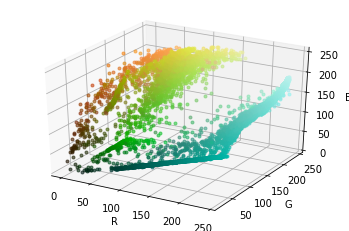

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
for i in range(len(img)):
    for j in range(len(img[i])):
        color = (img[i][j][2]/255,img[i][j][1]/255,img[i][j][0]/255)
        ax.plot([img[i][j][0]], [img[i][j][1]], [img[i][j][2]], markerfacecolor=color, markeredgecolor=color, marker='o', markersize=3, alpha=0.6)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.savefig('Dots.png')
plt.show()